In [22]:
import pandas as pd

In [23]:
# the datasets with all the different settings and the "cost" features
myDF = pd.read_csv("../placement-decisions-different-costs/combined_placementDecisions_rl_los_cost_3_WR_cap.csv")

In [24]:
myDF.columns

Index(['c_occu_jail', 'c_occu_wr', 'c_occu_hd', 'c_vio', 'ocp_jl_low_los',
       'ocp_jl_total', 'ocp_wr_low_los', 'ocp_wr_total', 'ocp_hd_low_los',
       'ocp_hd_total', 'class_mild', 'need', 'placement'],
      dtype='object')

In [25]:
# one hot encoding  -> the target is "placement", so we don't need to encode this column, also bcz RandomForest can handle categorical target data
# work release = 0 | home detention = 1 | jail = 2
for ind, item in myDF.iterrows():
    if item['placement'] == 'work release':
        myDF['placement'].iat[ind] = '0'
    elif item['placement'] == 'home detention':
        myDF['placement'].iat[ind] = '1'
    elif item['placement'] == 'jail':
        myDF['placement'].iat[ind] = '2'

#object to int
myDF['placement'] = pd.to_numeric(myDF['placement'])

In [35]:
sample_myDF = myDF.sample(20000)

In [42]:
myDF.columns

Index(['c_occu_jail', 'c_occu_wr', 'c_occu_hd', 'c_vio', 'ocp_jl_low_los',
       'ocp_jl_total', 'ocp_wr_low_los', 'ocp_wr_total', 'ocp_hd_low_los',
       'ocp_hd_total', 'class_mild', 'need', 'placement'],
      dtype='object')

In [63]:
y = sample_myDF['placement']
X = sample_myDF.drop(['placement','need','ocp_wr_low_los','ocp_hd_low_los','ocp_jl_low_los'], axis = 1)
X['c_occu_hd'] = X['c_occu_hd']*100000
X['c_occu_wr'] = X['c_occu_wr']*100000
X['c_occu_jail'] = X['c_occu_jail']*100000
X['c_vio'] = X['c_vio']*100
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, random_state = 50)

In [66]:
trained_rf = RandomForestClassifier(max_depth= None, max_features = 'log2', min_samples_leaf = 2, min_samples_split = 4, n_estimators= 230)
trained_rf.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', min_samples_leaf=2,
                       min_samples_split=4, n_estimators=230)

In [67]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, trained_rf.predict_proba(X_test), multi_class='ovr' )

0.9427242138063092

In [68]:
from sklearn.metrics import f1_score
y_pred = trained_rf.predict(X_test)
print('f1_score: ' + str(f1_score(y_test, y_pred, average='weighted')))

f1_score: 0.8137460649812533


<Axes: >

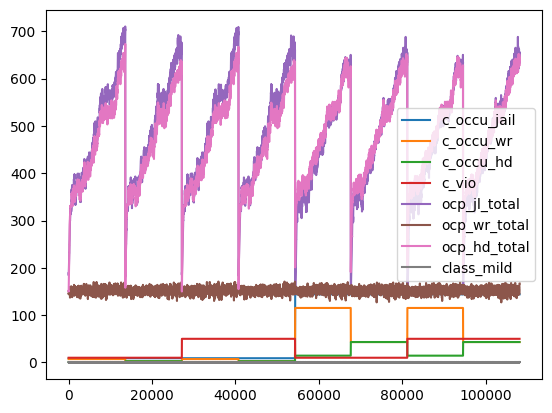

In [69]:
X.sort_index().plot()

In [70]:
import shap

In [72]:
import shap
explainer = shap.TreeExplainer(trained_rf)
shap_values = explainer(X_train)

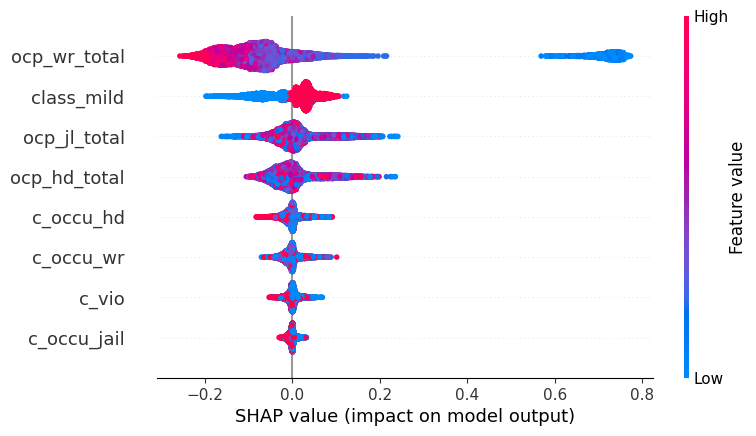

In [73]:
shap.plots.beeswarm(shap_values[:,:,0])